## Importar librerías

In [1]:
from segysak.segy import segy_loader
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

/home/ivan/anaconda3/lib/python3.7/site-packages/segysak/segy/_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Explore the segy file

Check that segy file exits

In [2]:
# specify the example file and check we have the example data

segy_file = pathlib.Path("/home/ivan/Documentos/DATOS SISMICOS/NISCOTA4B/Niscota_4B.sgy")
print("SEG-Y exists:", segy_file.exists())

SEG-Y exists: True


Get the text header information

In [3]:
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead
# examine the text header
get_segy_texthead(segy_file)

Text HeaderC 1 CLIENT                        COMPANY                       CREW NO
C 2 LINE            AREA                        MAP ID
C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER
C 4 INSTRUMENT: MFG            MODEL            SERIAL NO
C 5 DATA TRACES/RECORD        AUXILIARY TRACES/RECORD         CDP FOLD
C 6 SAMPLE INTERNAL         SAMPLES/TRACE       BITS/IN      BYTES/SAMPLE
C 7 RECORDING FORMAT        FORMAT THIS REEL        MEASUREMENT SYSTEM
C 8 SAMPLE CODE: FLOATING PT     FIXED PT     FIXED PT-GAIN     CORRELATED
C 9 GAIN  TYPE: FIXED     BINARY     FLOATING POINT     OTHER
C10 FILTERS: ALIAS     HZ  NOTCH     HZ  BAND    -     HZ  SLOPE    -    DB/OCT
C11 SOURCE: TYPE            NUMBER/POINT        POINT INTERVAL
C12     PATTERN:                           LENGTH        WIDTH
C13 SWEEP: START     HZ  END     HZ  LENGTH      MS  CHANNEL NO     TYPE
C14 TAPER: START LENGTH       MS  END LENGTH       MS  TYPE
C15 SPREAD: OFFSET        MAX DISTANCE        GROUP INTERVAL
C16 GEOPHONES: PER GROUP     SPACING     FREQUENCY     MFG          MODEL
C17     PATTERN:                           LENGTH        WIDTH
C18 TRACES SORTED BY: RECORD     CDP     OTHER
C19 AMPLITUDE RECOVEY: NONE      SPHERICAL DIV       AGC    OTHER
C20 MAP PROJECTION                      ZONE ID       COORDINATE UNITS
C21 PROCESSING:
C22 PROCESSING:
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39 SEG Y REV1
C40 END EBCDIC

## Read the trace headers 
Trace headers are read as DataFrame

In [4]:
trace_headers = segy_header_scrape(segy_file)
trace_headers

  0%|          | 0.00/3.57M [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,1,9,1,1,23,0,12,0,1,...,0,1,0,1,0,0,0,0,0,0
1,2,2,9,2,1,24,0,12,0,1,...,0,1,0,2,0,0,0,0,0,0
2,3,3,9,3,1,25,0,12,0,1,...,0,1,0,3,0,0,0,0,0,0
3,4,4,9,4,1,26,0,12,0,1,...,0,1,0,4,0,0,0,0,0,0
4,5,5,9,5,1,27,0,12,0,1,...,0,1,0,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,10252258,3566874,3437,1204,3645,216988,0,12,0,1,...,0,3645,0,7968,0,0,0,0,0,0
3566874,10252259,3566875,3437,1205,3645,216989,0,12,0,1,...,0,3645,0,7969,0,0,0,0,0,0
3566875,10252260,3566876,3437,1206,3645,216990,0,12,0,1,...,0,3645,0,7970,0,0,0,0,0,0
3566876,10252261,3566877,3437,1207,3645,216991,0,12,0,1,...,0,3645,0,7971,0,0,0,0,0,0


Print the column names of the trace headers

In [5]:
for col in trace_headers.columns:
    print(col)

TRACE_SEQUENCE_LINE
TRACE_SEQUENCE_FILE
FieldRecord
TraceNumber
EnergySourcePoint
CDP
CDP_TRACE
TraceIdentificationCode
NSummedTraces
NStackedTraces
DataUse
offset
ReceiverGroupElevation
SourceSurfaceElevation
SourceDepth
ReceiverDatumElevation
SourceDatumElevation
SourceWaterDepth
GroupWaterDepth
ElevationScalar
SourceGroupScalar
SourceX
SourceY
GroupX
GroupY
CoordinateUnits
WeatheringVelocity
SubWeatheringVelocity
SourceUpholeTime
GroupUpholeTime
SourceStaticCorrection
GroupStaticCorrection
TotalStaticApplied
LagTimeA
LagTimeB
DelayRecordingTime
MuteTimeStart
MuteTimeEND
TRACE_SAMPLE_COUNT
TRACE_SAMPLE_INTERVAL
GainType
InstrumentGainConstant
InstrumentInitialGain
Correlated
SweepFrequencyStart
SweepFrequencyEnd
SweepLength
SweepType
SweepTraceTaperLengthStart
SweepTraceTaperLengthEnd
TaperType
AliasFilterFrequency
AliasFilterSlope
NotchFilterFrequency
NotchFilterSlope
LowCutFrequency
HighCutFrequency
LowCutSlope
HighCutSlope
YearDataRecorded
DayOfYear
HourOfDay
MinuteOfHour
SecondOf

Select some columns from the trace headers.

In [6]:
sou_rec_pos=trace_headers[['EnergySourcePoint','SourceX','SourceY','GroupX','GroupY']].drop_duplicates()
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY
0,1,1182365,1105911,1181982,1106233
1,1,1182365,1105911,1182018,1106201
2,1,1182365,1105911,1182053,1106169
3,1,1182365,1105911,1182089,1106137
4,1,1182365,1105911,1182124,1106105
...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056
3566874,3645,1201128,1105871,1200978,1106024
3566875,3645,1201128,1105871,1201013,1105992
3566876,3645,1201128,1105871,1201049,1105959


## Plot the source positions

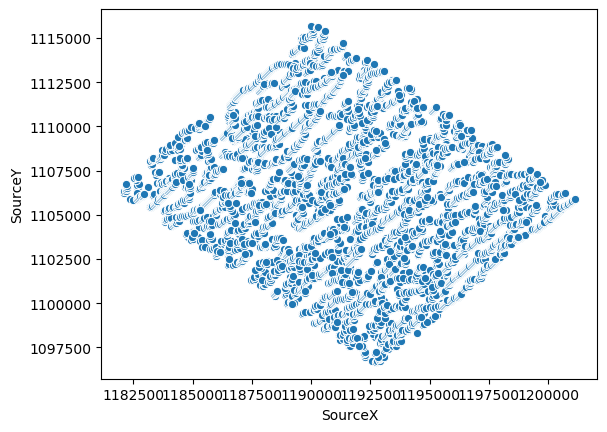

In [7]:
import seaborn as sns
sou_pos=sou_rec_pos.drop_duplicates(subset=['EnergySourcePoint'])
sns.scatterplot(data=sou_pos, x="SourceX", y="SourceY")
plt.show()

## Plot receiver positions

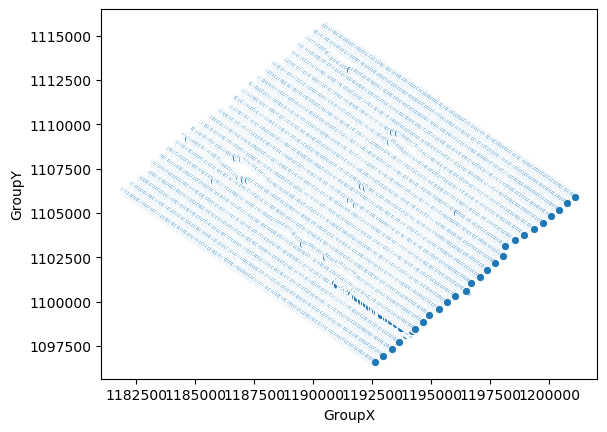

In [8]:
rec_pos=sou_rec_pos.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=sou_rec_pos, x="GroupX", y="GroupY")
plt.show()

## Plot receiver positions for one selected source

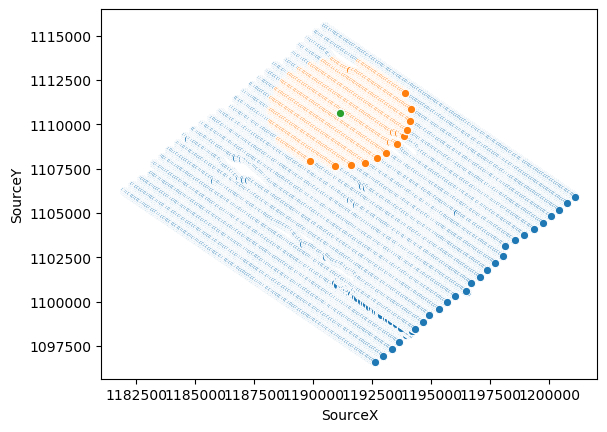

In [9]:
source=1000
shot_point=sou_rec_pos[sou_rec_pos['EnergySourcePoint']==source]
sns.scatterplot(data=sou_rec_pos, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_point, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_point, x="SourceX", y="SourceY")
plt.show()

## Read traces
Read the traces for one specific source as **seismic_data** DataSet.

In [10]:
from segysak.segy import segy_loader
seismic_data = segy_loader(
    segy_file,
    head_df=trace_headers[trace_headers['EnergySourcePoint'] == source].copy()
)
seismic_data

Couldn't determine geometry, will load traces as flat 2D.


Converting SEGY:   0%|          | 0.00/3.57M [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (cdp: 1180, twt: 4001)
Coordinates:
  * cdp      (cdp) int64 871637 871638 871639 871640 ... 872814 872815 872816
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
Data variables:
    data     (cdp, twt) float32 26.84 25.84 23.84 29.84 ... 9.652 10.65 6.652
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Niscota_4B.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-889.8376048443156, -800.4244018343487, -107.494685...
    coord_scalar:        1.0

Change time coordinate

In [11]:
seismic_data["time"] = ("time",  np.array(seismic_data.twt*1e-3, dtype='f'))
seismic_data["data"] = (("cdp", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:  (cdp: 1180, twt: 4001, time: 4001)
Coordinates:
  * cdp      (cdp) int64 871637 871638 871639 871640 ... 872814 872815 872816
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
Data variables:
    data     (cdp, time) float32 26.84 25.84 23.84 29.84 ... 9.652 10.65 6.652
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Niscota_4B.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-889.8376048443156, -800.4244018343487, -107.494685...
    coord_scalar:        1.0

## Plot one trace

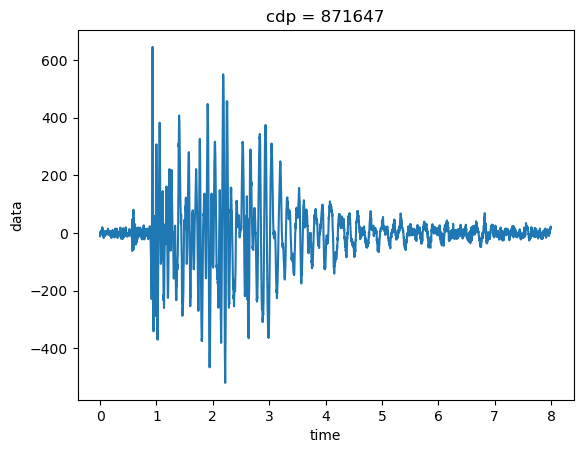

In [12]:
data=seismic_data.data  #DataArray from DataSet0
trace = data.isel(cdp=10) #Select trace for one cdp
trace.plot()
plt.show()

## Save selected data and headers
save **seismic_data** DataSet as netCDF file

In [13]:
seismic_data.attrs['ns']=str('None')
seismic_data.attrs['epsg']=str('None')
seismic_data.attrs['d3_domain']=str('None')
seismic_data.attrs['corner_points']=str('None')
seismic_data.attrs['corner_points_xy']=str('None')
seismic_data.attrs['srd']=str('None')
seismic_data.attrs['datatype']=str('None')
seismic_data
seismic_data.to_netcdf("seismic_data_source_1000.nc")

save **sou_rec_pos** DataFrame as PKL file

In [14]:
sou_rec_pos.to_pickle("sou_rec_pos.pkl")